In [1]:
#..Create by Chuyan on Nov 18th, 2022. This file was intended to plot the Plots required by the paper..

import netCDF4 as nc
# from numpy import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
# import PyNIO as Nio #deprecated
import pandas as pd
import glob
from scipy.stats import *
from copy import deepcopy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from area_mean import *
from scipy.optimize import curve_fit
import seaborn as sns
from copy import deepcopy
from useful_func_cy import *
from fitLRM_cy1 import *
from fitLRM_cy2 import *
from calc_Radiation_LRM_1 import *
from calc_Radiation_LRM_2 import *
from calc_LRM_metric import *
from calc_LRMobs_metric import *
from fitLRMobs import *

from get_LWPCMIP5data import *
from get_LWPCMIP6data import *
from get_OBSLRMdata import *

from Aploting_Sep11 import *


In [2]:
# 12 cmip6 model: deck_nas = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']

exp = 'piControl'
    
# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

# basic setting:

# cmip5 + cmip6
deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, CNRMCM61HR, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1, BNUESM, CCSM4, CNRMCM5, CSIRO_Mk360, CanESM2, FGOALSg2, FGOALSs2, GFDLCM3, GISSE2H, GISSE2R, IPSLCM5ALR, MIROC5, MPIESMMR, NorESM1M, MIROCESM, MRICGCM3, MPIESMLR, bcccsm11, GFDLESM2G, GFDLESM2M]  # current # 30 + 20 = 50
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM21', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'CNRMCM61HR', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1', 'BNUESM', 'CCSM4', 'CNRMCM5', 'CSIRO_Mk360', 'CanESM2', 'FGOALSg2', 'FGOALSs2', 'GFDLCM3', 'GISSE2H', 'GISSE2R', 'IPSLCM5ALR', 'MIROC5', 'MPIESMMR', 'NorESM1M', 'MIROCESM', 'MRICGCM3', 'MPIESMLR', 'bcccsm11', 'GFDLESM2G', 'GFDLESM2M']  # current # 30 + 20 = 50

deck_cmip6 = [AWICM11MR, BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CESM2WACCMFV2, CMCCCM2SR5, CNRMESM21, CNRMCM61, CNRMCM61HR, E3SM10, ECEarth3, ECEarth3Veg, FGOALSg3, GFDLCM4, CAMSCSM1, IPSLCM6ALR, INM_CM48, MPIESM12LR, MRIESM20, GISSE21G, GISSE22G, GISSE21H, MIROC6, MIROCES2L, NESM3, NorESM2MM, SAM0, TaiESM1]   #..current # 18 + 12

deck_nas_cmip6 = ['AWICM11MR', 'BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CESM2WACCMFV2', 'CMCCCM2SR5', 'CNRMESM2', 'CNRMCM61', 'CNRMCM61HR', 'E3SM10', 'ECEarth3', 'ECEarth3Veg', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'IPSLCM6ALR', 'INM_CM48', 'MPIESM12LR', 'MRIESM20', 'GISSE21G', 'GISSE21H', 'GISSE22G', 'MIROC6', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'SAM0', 'TaiESM1']

# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) + 2.5  #..southern-ocaen latitude edge: 9

#.. current model #: 18 + 12 (except: '19')
path_data = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path_plot = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/plot_file/plots_Oct24_revise_add_YSSAR/'

In [3]:
def Fig1a_base(s_range, x_range, y_range, deck2 = deck2, deck_nas2 = deck_nas2, path1 = path_data, path6 = path_plot):
    #.. Extra-tropical Latitudinal distribution of SWfb (a)..
    # Read CMIP5/ 6 Cloud feedbacks map data:

    fn_cmip5 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/CMIP5_cld_fbks.nc'
    fn_cmip6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/CMIP6_cld_fbkd_July12.nc'
    
    # glob.glob(fn_cmip5)
    f_cmip5 = nc.Dataset(fn_cmip5, 'r')
    f_cmip6 = nc.Dataset(fn_cmip6, 'r')
    # print(f_cmip5.variables['model'])
    # print(f_cmip6.variables)


    # variables from Zelinka's SWfb files:
    lat_mz = np.asarray(f_cmip6.variables['latitude'])
    bound_lat_mz = np.asarray(f_cmip6.variables['bounds_latitude'])

    lon_mz = np.asarray(f_cmip6.variables['longitude'])
    bound_lon_mz = np.asarray(f_cmip6.variables['bounds_longitude'])

    # convert longitude matrix from (0, 360) to (-180., 180.):
    lon_mz2 = lon_mz[:]*1.
    bound_lon_mz2 = bound_lon_mz[:] * 1.
    lon_mz2[lon_mz2 > 180] = lon_mz2[lon_mz2 > 180]-360.
    bound_lon_mz2[bound_lon_mz2 > 180] = bound_lon_mz2[bound_lon_mz2 > 180] - 360
    ind_lon = argsort(lon_mz2)
    lon_mz2 = lon_mz2[ind_lon]

    bound_lon_mz2 = bound_lon_mz2[ind_lon, :]
    # print(lon_mz2)
    # print(bound_lon_mz2)
    
    # model_names:
    cmip6model_nas = f_cmip6.variables['model'].long_name
    cmip5model_nas = f_cmip5.variables['model'].long_name

    cmip6_nas = cmip6model_nas[1:-1].split()
    for i in range(len(cmip6_nas)):
        cmip6_nas[i] = cmip6_nas[i][1:-1]

    cmip5_nas = cmip5model_nas[1:-1].split()
    for i in range(len(cmip5_nas)):
        cmip5_nas[i] = cmip5_nas[i][1:-1]
    # print(cmip6_nas)
    # print(cmip5_nas)

    model_nas = []
    model_nas = np.append(cmip6_nas, cmip5_nas)
    print(model_nas)

    # SW_cloud_Feedback:
    sw_cld_fb_mz = []

    cmip6_sw_cld_fb_mz = np.asarray(f_cmip6.variables['SWCLD_fbk6_map'])
    cmip5_sw_cld_fb_mz = np.asarray(f_cmip5.variables['SWCLD_fbk5_map'])

    sw_cld_fb_mz = np.append(cmip6_sw_cld_fb_mz, cmip5_sw_cld_fb_mz, axis = 2)
    print('sw_cld_fb_mz shape:', sw_cld_fb_mz.shape)

    # Handle nan value
    sw_cld_fb_mz = np.where(sw_cld_fb_mz!=1.e+20, sw_cld_fb_mz, np.nan)
    ind_nan = np.isnan(sw_cld_fb_mz)
    # print(np.nonzero(ind_nan==True))  # #0

    reshape_sw_cld_fb = np.transpose(sw_cld_fb_mz,(2, 0, 1))

    print('reshape_sw_cld_fb shape:', reshape_sw_cld_fb.shape)
    
    # Southern Ocean regional map of SWfb (50 GCMs):
    # SO_sw_cldfb = area_mean(reshape_sw_cld_fb[:,(latsi0):(latsi1+1+1),:], y_range_swcld, x_range_swcld) # -85.S ~ -40.S
    SO_sw_cldfb = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-85., -40.])
    # SO_sw_cldfb_5085 = area_mean(reshape_sw_cld_fb[:,(latsi0):(latsi2+1+1),:], y_range_swcld5085, x_range_swcld) # -85.S ~ -50.S
    SO_sw_cldfb_5085 = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-85., -50.])
    # SO_sw_cldfb_4050 = area_mean(reshape_sw_cld_fb[:,(latsi2+1):(latsi1+1+1),:], y_range_swcld4050, x_range_swcld) # -50.S ~ -40.S
    SO_sw_cldfb_4050 = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-50., -40.])
    # print(SO_sw_cldfb)
    
    SW_FB_4085 = []
    SW_FB_5085 = []
    SW_FB_4050 = []

    for i in range(len(deck2)):
        for j in range(len(SO_sw_cldfb)):
            # 50
            if (deck2[i]['modn']== model_nas[j]):
                # if (i in modelconstraintbystep1_nas):
                SW_FB_4085 = np.append(SW_FB_4085, SO_sw_cldfb[j])
                SW_FB_4050 = np.append(SW_FB_4050, SO_sw_cldfb_4050[j])
                SW_FB_5085 = np.append(SW_FB_5085, SO_sw_cldfb_5085[j])
                
    SWCLD_specific_models = []
    
    # get the SW cloud feedback map data for our models list:
    for i in range(len(deck2)):
        for j in range(reshape_sw_cld_fb.shape[0]):

            if (deck2[i]['modn'] == model_nas[j]):

                SWCLD_specific_models.append(reshape_sw_cld_fb[j])

    SWCLD_specific_models = np.asarray(SWCLD_specific_models)
    # print(reshape_sw_cld_fb[61])
    # print(SWCLD_specific_models[49])

    # processing NaN values:
    ind_false_SWCLD = np.isnan(SWCLD_specific_models)
    SWCLD_withoutNaN = deepcopy(SWCLD_specific_models)
    SWCLD_withoutNaN[ind_false_SWCLD] = 999

    # convert SWCLD metric longitude from (0, 360) to (-180., 180.):
    SWCLD_withoutNaN = SWCLD_withoutNaN[:, :, ind_lon]
    
    print(np.asarray(np.nonzero(ind_false_SWCLD == True)).shape)
    print(SWCLD_withoutNaN[:,2, 3].shape)

      
    # import Mark's data for CMIP5, CMIP6 models' EffCS, SWCLD..:
    import json
    
    f = open('cmip56_forcing_feedback_ecs.json','r')
    data = json.load(f)
    
    # read through CMIP5 + CMIP6 EffCS and SWfb values:
    EffCS = {}
    SWCLD = {}

    for i in range(len(deck_nas2)):

        if deck2[i]['cmip'] == 'cmip5':
            EffCS[deck_nas2[i]] = data['CMIP5'][deck2[i]['modn']][deck2[i]['ensmem']]['ECS']
            SWCLD[deck_nas2[i]] = data['CMIP5'][deck2[i]['modn']][deck2[i]['ensmem']]['SWCLD']

        if deck2[i]['cmip'] == 'cmip6':

            if deck2[i]['modn'] == 'EC-Earth3':
                EffCS[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']]['r8i1p1f1']['ECS']
                SWCLD[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']]['r8i1p1f1']['SWCLD']
            else:
                EffCS[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']][deck2[i]['ensmem']]['ECS']
                SWCLD[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']][deck2[i]['ensmem']]['SWCLD']
    
    # Plotting: 
    
    # Re-plot of Fig 1: SW_FB in raw resolutions vs. Lat of extra-tropical:
    
    import matplotlib
    parameters = {'axes.labelsize': 16, 'legend.fontsize': 14,
             'axes.titlesize': 22,  'xtick.labelsize': 16,  'ytick.labelsize': 16}
    plt.rcParams.update(parameters)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5.5))

    ax1.minorticks_on()
    ax1.tick_params(axis='x', which='major', direction='out', top=False, length= 5., width = 1., reset = True)
    ax1.tick_params(axis='x', which='minor', direction='out', top=False, length= 3., width = 1., reset = True)

    ax2.minorticks_on()
    ax2.tick_params(axis='x', which='major', direction='out', top=False, length= 5., width = 1., reset = True)
    ax2.tick_params(axis='x', which='minor', direction='out', top=False, length= 3., width = 1., reset = True)


    print('SWCLD_withoutNaN shape:', SWCLD_withoutNaN.shape)

    p50_MM = np.full((SWCLD_withoutNaN.shape[1], 2), 0.00)
    p95_MM = np.full((SWCLD_withoutNaN.shape[1], 2), 0.00)

    # print(lat_mz)
    lat_range1 = [-85., -30.] 
    lat_range2 = [ 30.,  85.]
    ind1 = (lat_mz <=max(lat_range1)) & (lat_mz >= min(lat_range1))
    ind2 = (lat_mz <=max(lat_range2)) & (lat_mz >= min(lat_range2))


    lonmean_MLAT_swcld = np.nanmean(SWCLD_withoutNaN, axis = (2))
    for i in range(SWCLD_withoutNaN.shape[1]):
        p50_MM[i, 0] = np.nanpercentile(lonmean_MLAT_swcld[:, i], 25.)
        p95_MM[i, 0] = np.nanpercentile(lonmean_MLAT_swcld[:, i], 0.)
        p50_MM[i, 1] = np.nanpercentile(lonmean_MLAT_swcld[:, i], 75.)
        p95_MM[i, 1] = np.nanpercentile(lonmean_MLAT_swcld[:, i], 100.)
    mean_LAT_swcld = np.nanmean(SWCLD_withoutNaN, axis = (0, 2))

    ECS = []
    for i in range(len(deck_nas2)):
        ECS.append(EffCS[deck_nas2[i]])
    ECS = np.asarray(ECS)

    sorted_EffCS_index = sorted(range(50), key = lambda index:ECS[index])
    ordinal_EffCS_index = [sorted_EffCS_index.index(i) for i in range(50)]
    # print(sorted_EffCS_index)
    # print(ordinal_EffCS_index)


    # Colors:
    coolwarm_colormap = matplotlib.cm.get_cmap("coolwarm")
    COLORS = [coolwarm_colormap(x) for x in np.linspace(0.05, 0.95, num=50)]
    COLORS = [matplotlib.colors.to_hex(color) for color in COLORS]
    print(COLORS)

    for i in range(len(deck_nas2)):

        ss = SWCLD_withoutNaN[i, :,:]
        xx = np.nanmean(ss, axis = 1)
        # Remove the NaN value in 1-D vector:
        ind_truevector = isnan(xx)==False

        ind1_true = np.logical_and(ind1, ind_truevector)
        ind2_true = np.logical_and(ind2, ind_truevector)
        # print(arange(min(lat_range1), max(lat_range1), 2.))
        ax1.plot(arange(min(lat_range1), max(lat_range1), 2.), xx[ind1_true], color = COLORS[ordinal_EffCS_index[i]], linestyle = '-')
        ax1.plot(arange(min(lat_range1), max(lat_range1), 2.), mean_LAT_swcld[ind1_true], linewidth = 2.5, c = 'k', linestyle = '-')

        ax2.plot(arange(min(lat_range2), max(lat_range2), 2.), xx[ind2_true], color = COLORS[ordinal_EffCS_index[i]], linestyle = '-')
        ax2.plot(arange(min(lat_range2), max(lat_range2), 2.), mean_LAT_swcld[ind2_true], linewidth = 2.5, c = 'k', linestyle = '-')

    # Shading:

    ax1.plot(np.arange(min(lat_range1), max(lat_range1), 2.), p50_MM[:, 0][ind1_true], linestyle = '-', c= 'white', linewidth = 4.0, zorder = 97)
    ax1.plot(np.arange(min(lat_range1), max(lat_range1), 2.), p50_MM[:, 1][ind1_true], linestyle = '-', c= 'white', linewidth = 2.8, zorder = 97)
    # ax1.plot(np.arange(min(lat_range1), max(lat_range1), 2.), p95_MM[:, 0][ind1_true], linestyle = '-', c= 'white', linewidth = 1.4, zorder = 97)
    # ax1.plot(np.arange(min(lat_range1), max(lat_range1), 2.), p95_MM[:, 1][ind1_true], linestyle = '-', c= 'white', linewidth = 1.4, zorder = 97)
    ax1.fill_between(np.arange(min(lat_range1), max(lat_range1), 2.), p50_MM[:, 0][ind1_true], p50_MM[:, 1][ind1_true], color = 'gray', alpha = 0.45, zorder = 98)
    # ax1.fill_between(np.arange(min(lat_range1), max(lat_range1), 2.), p95_MM[:, 0][ind1_true], p95_MM[:, 1][ind1_true], color = 'gray', alpha = 0.30, zorder = 99)

    ax2.plot(np.arange(min(lat_range2), max(lat_range2), 2.), p50_MM[:, 0][ind2_true], linestyle = '-', c= 'white', linewidth = 4.0, zorder = 97)
    ax2.plot(np.arange(min(lat_range2), max(lat_range2), 2.), p50_MM[:, 1][ind2_true], linestyle = '-', c= 'white', linewidth = 2.8, zorder = 97)
    ax2.fill_between(np.arange(min(lat_range2), max(lat_range2), 2.), p50_MM[:, 0][ind2_true], p50_MM[:, 1][ind2_true], color = 'gray', alpha = 0.45, zorder = 98)
    # ax2.fill_between(np.arange(min(lat_range2), max(lat_range2), 2.), p95_MM[:, 0][ind2_true], p95_MM[:, 1][ind2_true], color = 'gray', alpha = 0.30, zorder = 99)

    # Plot setting:
    ax1.set_xlim(-85., -30.)
    ax1.set_xticks(np.arange(-80., -30., 20.))
    ax1.set_ylim(-4.25, 6.25)

    ax2.set_xlim(30., 85.)
    ax2.set_xticks(np.arange(40., 85., 20.))
    ax2.set_ylim(-4.25, 6.25)

    ax1.set_xlabel(r"$lat$")
    ax1.set_ylabel(r"$SW\ Cloud\ Feedback,\ [W/m^{2}/K] $")

    ax2.set_xlabel(r"$lat$")
    # ax2.set_ylabel(r"$SW\ Cloud\ Feedback,\ [W/m^{2}/K] $")

    # plt.savefig(path6 +"Fig1:(a).jpg", bbox_inches = 'tight', dpi = 425)
    
    
    #.. Extra-tropical Latitudinal distribution of \Delta LWP/\Delta gmt (b)..
    
    # import numpy as np
    # from scipy.optimize import curve_fit

    # define the curve function which you intend to fit:
    def target_func_poly1(x, a, b):
        '''
        linear fit
        '''
        y = a* x + b
        return y

    def target_func_poly2(x, a, b, c): 
        '''
        2d polynomial fit
        '''
        y = a* x**2 + b* x**1 + c
        return y

    def target_func_expo(x, a, b, c):

        '''
        exponential fitting
        '''
        y = a * b**x + c
        return y
    
    
    ## Read 50 GCMs raw resolution and 5X5 bin data:

    path2 = '/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/'
    output_ARRAY_5x5 = {}   # storage output file

    # Raw data
    output_dict0_PI = {}
    output_dict0_abr = {}

    # Metric raw data in specific units:
    output_PI_bin_var = {}
    output_abr_bin_var = {}
    shape_mon_pi = {}
    shape_mon_abr = {}

    Tr_sst =  0.0

    for i in range(len(deck2)):
        # print("i", i)
        folder_5x5 = glob.glob(path2 + deck2[i]['modn'] + '_raw_5X5bin_Nov11th_'+'_dats.npz')
        print(len(folder_5x5))

        if len(folder_5x5) == 4:
            if (len(folder_5x5[0]) < len(folder_5x5[1])) & (len(folder_5x5[0]) < len(folder_5x5[2])) & (len(folder_5x5[0]) < len(folder_5x5[3])):
                folder_bes_5x5 = folder_5x5[0]
            elif (len(folder_5x5[1]) < len(folder_5x5[0])) & (len(folder_5x5[1]) < len(folder_5x5[2])) & (len(folder_5x5[1]) < len(folder_5x5[3])):
                folder_bes_5x5 = folder_5x5[1]
            elif (len(folder_5x5[2]) < len(folder_5x5[0])) & (len(folder_5x5[2]) < len(folder_5x5[1])) & (len(folder_5x5[2]) < len(folder_5x5[3])):
                folder_bes_5x5 = folder_5x5[2]
            else:
                folder_bes_5x5 = folder_5x5[3]
            print(folder_bes_5x5)

        elif len(folder_5x5) == 3:
            if (len(folder_5x5[1]) <  len(folder_5x5[0])) & (len(folder_5x5[1]) <  len(folder_5x5[2])):
                folder_bes_5x5 = folder_5x5[1]
            elif (len(folder_5x5[0]) <  len(folder_5x5[1])) & (len(folder_5x5[0]) <  len(folder_5x5[2])):
                folder_bes_5x5 = folder_5x5[0]
            else:
                folder_bes_5x5 = folder_5x5[2]
            print(folder_bes_5x5)

        elif len(folder_5x5) == 2:
            if len(folder_5x5[1]) <  len(folder_5x5[0]):
                folder_bes_5x5 = folder_5x5[1]
            else:
                folder_bes_5x5 = folder_5x5[0]
            print(folder_bes_5x5)

        else:
            output_ARRAY_5x5[deck_nas2[i]] = load(folder_5x5[0], allow_pickle = True)  #+'_'+str(Tr_sst)
            print(folder_5x5[0])

        # output_ARRAY[deck_nas2[i]] =  load(folder_bes_5x5, allow_pickle=True)  #+'_'+str(Tr_sst)

        # output_ARRAY[deck_nas2[i]] = load(folder_5x5[0], allow_pickle = True)  #+'_'+str(Tr_sst)
        # output_intermedia[deck_nas2[i]] = output_ARRAY_5x5[deck_nas2[i]]['rawdata_dict']

        output_dict0_PI[deck_nas2[i]] = output_ARRAY_5x5[deck_nas2[i]]['dict0_PI_var']
        output_dict0_abr[deck_nas2[i]] = output_ARRAY_5x5[deck_nas2[i]]['dict0_abr_var']

        # Monthly data
        output_PI_bin_var[deck_nas2[i]] = output_ARRAY_5x5[deck_nas2[i]]['dict1_PI_bin_var']
        output_abr_bin_var[deck_nas2[i]] = output_ARRAY_5x5[deck_nas2[i]]['dict1_abr_bin_var']
        # Annually data

        # Flattened Metric monthly mean bin data
        # shape_mon_pi[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]][()]['shape_mon_PI_3']
        # shape_mon_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]][()]['shape_mon_abr_3']
        
    print('Down read 5 x 5.')
    
    # calc the mean state LWP and delta LWP and delta P-E in global 5 x 5 bin resolutions;

    delta_LWP_dTg_ALL_5X5 = full((len(deck2), 36, 72), 0.0)  # GLOBAL lwp changes
    mean_LWP_ALL_5X5 = full((len(deck2), 36, 72), 0.0)  # GLOBAL Mean State lwp
    delta_P_E_dTg_ALL_5X5 = full((len(deck2), 36, 72), 0.0)  # Global moisture convergence changes
    
    # global mean surface air Temperature (gmt):
    delta_gmt = full(len(deck2), 0.000)
    
    
    f20yr_index = 121*12
    l20yr_index = 141*12
    
    # gmt.
    for i in range(len(deck_nas2)):
        
        delta_gmt[i] = np.nanmean(area_mean(output_abr_bin_var[deck_nas2[i]][()]['gmt_mon_bin'][f20yr_index:l20yr_index, :,:], s_range, x_range)) - np.nanmean(area_mean(output_PI_bin_var[deck_nas2[i]][()]['gmt_mon_bin'], s_range, x_range)) 
    
    # \Delta LWP scaled by gmt; mean State LWP; and \Delta moisture convergence scaled by gmt:
    for i in range(len(deck_nas2)):
        delta_LWP_dTg_ALL_5X5[i] = (np.nanmean(output_abr_bin_var[deck_nas2[i]][()]['LWP_mon_bin'][f20yr_index:l20yr_index,:,:], axis = 0) - np.nanmean(output_PI_bin_var[deck_nas2[i]][()]['LWP_mon_bin'], axis = 0)) / delta_gmt[i]
        
        mean_LWP_ALL_5X5[i] = deepcopy(np.nanmean(output_PI_bin_var[deck_nas2[i]][()]['LWP_mon_bin'], axis = 0))
        
        delta_P_E_dTg_ALL_5X5[i] = (np.nanmean(output_abr_bin_var[deck_nas2[i]][()]['p_e_mon_bin'][f20yr_index:l20yr_index,:,:], axis = 0) - np.nanmean(output_PI_bin_var[deck_nas2[i]][()]['p_e_mon_bin'], axis = 0)) / delta_gmt[i]
    
    
    # import Mark's data for CMIP5, CMIP6 models' EffCS, SWCLD..:
    import json
    
    f = open('cmip56_forcing_feedback_ecs.json','r')
    data = json.load(f)
    
    # read through CMIP5 + CMIP6 EffCS and SWfb values:
    EffCS = {}
    SWCLD = {}

    for i in range(len(deck_nas2)):

        if deck2[i]['cmip'] == 'cmip5':
            EffCS[deck_nas2[i]] = data['CMIP5'][deck2[i]['modn']][deck2[i]['ensmem']]['ECS']
            SWCLD[deck_nas2[i]] = data['CMIP5'][deck2[i]['modn']][deck2[i]['ensmem']]['SWCLD']

        if deck2[i]['cmip'] == 'cmip6':

            if deck2[i]['modn'] == 'EC-Earth3':
                EffCS[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']]['r8i1p1f1']['ECS']
                SWCLD[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']]['r8i1p1f1']['SWCLD']
            else:
                EffCS[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']][deck2[i]['ensmem']]['ECS']
                SWCLD[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']][deck2[i]['ensmem']]['SWCLD']
    
    # Plotting: 
    
    # Re-plot Fig 1: \Delta LWP/ \Delta GMT in 5X5 degree vs. Extratropical Lat:

    import matplotlib
    parameters = {'axes.labelsize': 16, 'legend.fontsize': 14,
             'axes.titlesize': 22,  'xtick.labelsize': 16,  'ytick.labelsize': 16}
    plt.rcParams.update(parameters)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5.5))

    ax1.minorticks_on()
    ax1.tick_params(axis='x', which='major', direction='out', top=False, length= 5., width = 1., reset = True)
    ax1.tick_params(axis='x', which='minor', direction='out', top=False, length= 3., width = 1., reset = True)

    ax2.minorticks_on()
    ax2.tick_params(axis='x', which='major', direction='out', top=False, length= 5., width = 1., reset = True)
    ax2.tick_params(axis='x', which='minor', direction='out', top=False, length= 3., width = 1., reset = True)

    p50_MM = np.full((len(s_range), 2), 0.00)
    p95_MM = np.full((len(s_range), 2), 0.00)

    # print(lat_mz)
    lat_range1 = [-85., -30.] 
    lat_range2 = [ 30.,  85.]
    ind1 = (s_range <=max(lat_range1)) & (s_range >= min(lat_range1))
    ind2 = (s_range <=max(lat_range2)) & (s_range >= min(lat_range2))
    print(ind1, ind2)

    lonmean_MLAT_DlwpDgmt = np.nanmean(1000. * delta_LWP_dTg_ALL_5X5, axis = (2))

    for i in range(len(s_range)):

        p50_MM[i, 0] = np.nanpercentile(lonmean_MLAT_DlwpDgmt[:, i], 25.)
        p95_MM[i, 0] = np.nanpercentile(lonmean_MLAT_DlwpDgmt[:, i], 2.5)
        p50_MM[i, 1] = np.nanpercentile(lonmean_MLAT_DlwpDgmt[:, i], 75.)
        p95_MM[i, 1] = np.nanpercentile(lonmean_MLAT_DlwpDgmt[:, i], 97.5)
    mean_LAT_DlwpDgmt = np.nanmean(1000. * delta_LWP_dTg_ALL_5X5, axis = (0, 2))
    
    ECS = []
    for i in range(len(deck_nas2)):
        ECS.append(EffCS[deck_nas2[i]])
    ECS = np.asarray(ECS)
    sorted_EffCS_index = sorted(range(50), key = lambda index:ECS[index])
    ordinal_EffCS_index = [sorted_EffCS_index.index(i) for i in range(50)]
    # print(sorted_EffCS_index)
    # print(ordinal_EffCS_index)

    # Colors:
    coolwarm_colormap = matplotlib.cm.get_cmap("coolwarm")
    COLORS = [coolwarm_colormap(x) for x in np.linspace(0.05, 0.95, num=50)]
    COLORS = [matplotlib.colors.to_hex(color) for color in COLORS]
    print(COLORS)

    for i in range(len(deck_nas2)):

        ss = 1000 * delta_LWP_dTg_ALL_5X5[i, :,:]
        xx = nanmean(ss, axis = 1)
        # Remove the NaN value in 1-D vector:
        ind_truevector = isnan(xx)==False

        ind1_true = np.logical_and(ind1, ind_truevector)
        ind2_true = np.logical_and(ind2, ind_truevector)
        # print(arange(min(lat_range1), max(lat_range1), 2.))
        ax1.plot(np.arange(min(lat_range1), max(lat_range1), 5.), xx[ind1_true], color = COLORS[ordinal_EffCS_index[i]], linestyle = '-')
        ax1.plot(np.arange(min(lat_range1), max(lat_range1), 5.), mean_LAT_DlwpDgmt[ind1_true], linewidth = 2.5, c = 'k', linestyle = '-')

        ax2.plot(np.arange(min(lat_range2), max(lat_range2), 5.), xx[ind2_true], color = COLORS[ordinal_EffCS_index[i]], linestyle = '-')
        ax2.plot(np.arange(min(lat_range2), max(lat_range2), 5.), mean_LAT_DlwpDgmt[ind2_true], linewidth = 2.5, c = 'k', linestyle = '-')

    # Shading: 

    ax1.plot(np.arange(min(lat_range1), max(lat_range1), 5.), p50_MM[:, 0][ind1_true], linestyle = '-', c= 'white', linewidth = 4.0, zorder = 97)
    ax1.plot(np.arange(min(lat_range1), max(lat_range1), 5.), p50_MM[:, 1][ind1_true], linestyle = '-', c= 'white', linewidth = 2.8, zorder = 97)
    # ax1.plot(np.arange(min(lat_range1), max(lat_range1), 5.), p95_MM[:, 0][ind1_true], linestyle = '-', c= 'white', linewidth = 1.4, zorder = 97)
    # ax1.plot(np.arange(min(lat_range1), max(lat_range1), 5.), p95_MM[:, 1][ind1_true], linestyle = '-', c= 'white', linewidth = 1.4, zorder = 97)
    ax1.fill_between(np.arange(min(lat_range1), max(lat_range1), 5.), p50_MM[:, 0][ind1_true], p50_MM[:, 1][ind1_true], color = 'gray', alpha = 0.45, zorder = 98)
    # ax1.fill_between(np.arange(min(lat_range1), max(lat_range1), 5.), p95_MM[:, 0][ind1_true], p95_MM[:, 1][ind1_true], color = 'gray', alpha = 0.35, zorder = 99)

    ax2.plot(np.arange(min(lat_range2), max(lat_range2), 5.), p50_MM[:, 0][ind2_true], linestyle = '-', c= 'white', linewidth = 4.0, zorder = 97)
    ax2.plot(np.arange(min(lat_range2), max(lat_range2), 5.), p50_MM[:, 1][ind2_true], linestyle = '-', c= 'white', linewidth = 2.8, zorder = 97)
    ax2.fill_between(np.arange(min(lat_range2), max(lat_range2), 5.), p50_MM[:, 0][ind2_true], p50_MM[:, 1][ind2_true], color = 'gray', alpha = 0.45, zorder = 98)
    # ax2.fill_between(np.arange(min(lat_range2), max(lat_range2), 5.), p95_MM[:, 0][ind2_true], p95_MM[:, 1][ind2_true], color = 'gray', alpha = 0.35, zorder = 99)

    # Plot setting:
    ax1.set_xlim(-85., -30.)
    ax1.set_xticks(arange(-80., -30., 20.))
    ax1.set_ylim(-10.0, 17.0)
    
    ax2.set_xlim(30., 85.)
    ax2.set_xticks(arange(40., 85., 20.))
    ax2.set_ylim(-10.0, 17.0)
    
    ax1.set_xlabel(r"$lat$")
    ax1.set_ylabel(r"$\Delta LWP / \Delta GMT,\ [g/m^{2}/K] $")

    ax2.set_xlabel(r"$lat$")
    # ax2.set_ylabel(r"$\Delta LWP / \Delta GMT,\ [kg/m^{2}/K] $")

    
    # plt.savefig(path6 +"Fig1:(b)_5X5.jpg", bbox_inches = 'tight', dpi = 425)
    
    #####
    
    
    # Plotting FigS1: Annually time series of GCMs’ LWP averaged over 40 — 85S vs. GMT averaged over globally;
    
    # Calc the 40--85 averaged annually changes in LWP; globally averaged annually changes in GMT; colored by \Delta LWP/ \Delta GMT;

    an_delta_LWP_raw = full((len(deck_nas2), 150), 0.0)  # annually time series of 40 -- 85 averaged changes in LWP for GCMs;
    an_delta_GMT = full((len(deck_nas2), 150), 0.0)  # annually time series of globally changes in GMT for GCMs;
    
    for i in range(len(deck_nas2)):
        lat_range1 = [-85., -40.] 
        ind1 = (output_dict0_abr[deck_nas2[i]][()]['lat'] <=max(lat_range1)) & (output_dict0_abr[deck_nas2[i]][()]['lat'] >= min(lat_range1))

        an_delta_LWP_raw[i,:] = (area_mean(annually_mean(output_dict0_abr[deck_nas2[i]][()]['LWP'][:, ind1,:], output_dict0_abr[deck_nas2[i]][()]['times'], label = 'mon'), output_dict0_abr[deck_nas2[i]][()]['lat'][ind1], output_dict0_abr[deck_nas2[i]][()]['lon'])[0:150] - np.nanmean(area_mean(annually_mean(output_dict0_PI[deck_nas2[i]][()]['LWP'][:, ind1,:], output_dict0_PI[deck_nas2[i]][()]['times']), output_dict0_PI[deck_nas2[i]][()]['lat'][ind1], output_dict0_PI[deck_nas2[i]][()]['lon'])))
        
        an_delta_GMT[i,:] = (area_mean(annually_mean(output_dict0_abr[deck_nas2[i]][()]['gmt'], output_dict0_abr[deck_nas2[i]][()]['times'], label = 'mon'), output_dict0_abr[deck_nas2[i]][()]['lat'], output_dict0_abr[deck_nas2[i]][()]['lon'])[0:150] - np.nanmean(area_mean(annually_mean(output_dict0_PI[deck_nas2[i]][()]['gmt'], output_dict0_PI[deck_nas2[i]][()]['times']), output_dict0_PI[deck_nas2[i]][()]['lat'], output_dict0_PI[deck_nas2[i]][()]['lon'])))
    
    
    # Plotting: 
    # print(an_delta_GMT)
    # print(an_delta_LWP_raw)

    import matplotlib
    parameters = {'axes.labelsize': 15, 'legend.fontsize': 14,
             'axes.titlesize': 21,  'xtick.labelsize': 16,  'ytick.labelsize': 16}
    plt.rcParams.update(parameters)

    fig, ax = plt.subplots(1, 1, figsize=(8.5, 5.5))

    # print(s_range[1:10])
    DLWP_Dgmt = area_mean(delta_LWP_dTg_ALL_5X5[:, 1:10, :], s_range[1:10], x_range)
    # print(DLWP_Dgmt)
    DLWP_Dgmt = np.asarray(DLWP_Dgmt)

    sorted_DLWP_Dgmt_index = sorted(range(50), key = lambda index:DLWP_Dgmt[index])
    ordinal_DLWP_Dgmt_index = [sorted_DLWP_Dgmt_index.index(i) for i in range(50)]
    # print(sorted_DLWP_Dgmt_index)
    # print(ordinal_DLWP_Dgmt_index)

    # Colors:
    inferno_colormap = matplotlib.cm.get_cmap("coolwarm_r")
    COLORS = [inferno_colormap(x) for x in np.linspace(0.01, 0.97, num=50)]
    COLORS = [matplotlib.colors.to_hex(color) for color in COLORS]
    # print(COLORS)

    for i in range(len(deck2)):
        x = an_delta_GMT[i]
        ax.scatter(x, an_delta_LWP_raw[i], c = COLORS[ordinal_DLWP_Dgmt_index[i]], marker = 'x', s= 1)
        POPT_gmtLWP, POCV_gmtLWP = curve_fit(target_func_poly2, an_delta_GMT[i], an_delta_LWP_raw[i])
        # print(POPT_gmtLWP)
        ax.plot(x, POPT_gmtLWP[0] * x**2 + POPT_gmtLWP[1] * x**1 + POPT_gmtLWP[2], color = COLORS[ordinal_DLWP_Dgmt_index[i]], linewidth = 1.6, linestyle = '-', alpha = 0.8, zorder = 99)

    # Plot setting:

    ax.set_xlim(0., 9.4)
    ax.set_xticks(arange(0, 10, 1))
    ax.set_ylim(-0.012, 0.07)
    ax.set_yticks(arange(-0.01, 0.08, 0.01))
    ax.set_xlabel(r"$GMT\ -\ GMT|_{mean\ state},\ [K]$")
    ax.set_ylabel(r"$LWP\ -\ LWP|_{mean\ state},\ [kg/m^{2}]$")

    ax.set_title(r"$LWP\ _{40^{o} -85^{o} S}$", )

    # plt.savefig(path6 +"Figs1:annuallytimeseries_DLWP(SO)_Dgmt(globally).jpg", bbox_inches = 'tight', dpi = 425)
    
    return 0


['ACCESS-CM2' 'ACCESS-ESM1-5' 'AWI-CM-1-1-MR' 'BCC-CSM2-MR' 'BCC-ESM1'
 'CAMS-CSM1-0' 'CESM2' 'CESM2-FV2' 'CESM2-WACCM' 'CESM2-WACCM-FV2' 'CIESM'
 'CMCC-CM2-SR5' 'CMCC-ESM2' 'CNRM-CM6-1' 'CNRM-CM6-1-HR' 'CNRM-ESM2-1'
 'CanESM5' 'E3SM-1-0' 'EC-Earth3' 'EC-Earth3-AerChem' 'EC-Earth3-Veg'
 'FGOALS-f3-L' 'FGOALS-g3' 'GFDL-CM4' 'GFDL-ESM4' 'GISS-E2-1-G'
 'GISS-E2-1-H' 'GISS-E2-2-G' 'HadGEM3-GC31-LL' 'HadGEM3-GC31-MM'
 'IITM-ESM' 'INM-CM4-8' 'INM-CM5-0' 'IPSL-CM5A2-INCA' 'IPSL-CM6A-LR'
 'IPSL-CM6A-LR-INCA' 'KACE-1-0-G' 'MIROC-ES2L' 'MIROC6' 'MPI-ESM-1-2-HAM'
 'MPI-ESM1-2-HR' 'MPI-ESM1-2-LR' 'MRI-ESM2-0' 'NESM3' 'NorCPM1'
 'NorESM2-LM' 'NorESM2-MM' 'SAM0-UNICON' 'TaiESM1' 'UKESM1-0-LL'
 'ACCESS1-0' 'ACCESS1-3' 'BNU-ESM' 'CCSM4' 'CNRM-CM5' 'CSIRO-Mk3-6-0'
 'CanESM2' 'FGOALS-g2' 'FGOALS-s2' 'GFDL-CM3' 'GFDL-ESM2G' 'GFDL-ESM2M'
 'GISS-E2-H' 'GISS-E2-R' 'HadGEM2-ES' 'IPSL-CM5A-LR' 'IPSL-CM5A-MR'
 'IPSL-CM5B-LR' 'MIROC-ESM' 'MIROC5' 'MPI-ESM-LR' 'MPI-ESM-MR' 'MPI-ESM-P'
 'MRI-CGCM3' 'NorESM1-M' 'N

0

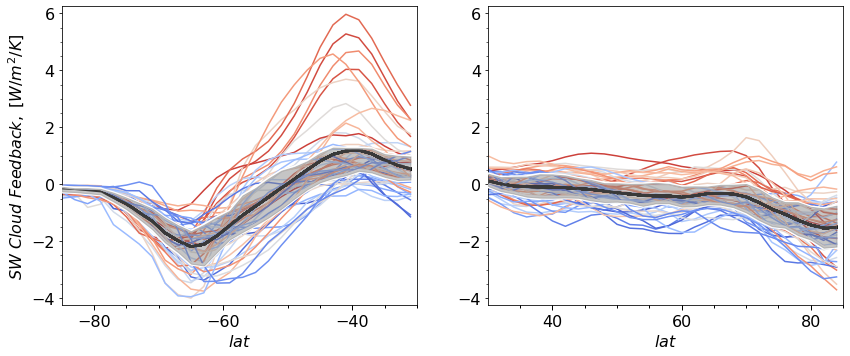

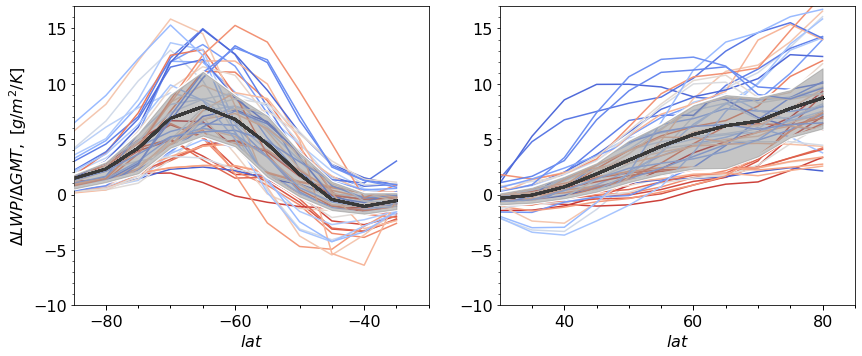

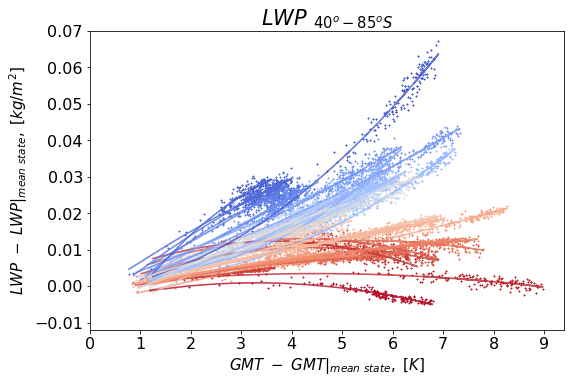

In [4]:
Fig1a_base(s_range = s_range, x_range = x_range, y_range = y_range, deck2 = deck2, deck_nas2 = deck_nas2, path1 = path_data, path6 = path_plot)

In [4]:
def target_func_poly2(x, a, b, c): 
        '''
        2d polynomial fit
        '''
        y = a* x**2 + b* x**1 + c
        return y


def target_func_poly1(x, a, b):
        '''
        linear fit
        '''
        y = a* x + b
        return y

In [5]:
# Plotting Fig8th: Annually series of GCMs’ LWP vs. P - E averaged over 40 — 85S;s

## Read two Regimes (Hot,Cold) data

output_ARRAY = {}   # storage output file
output_intermedia = {}   # storage the 'rawdata_dict'

output_dict0_PI = {}
output_dict0_abr = {}
output_2lrm_coef_LWP = {}

# Raw data
output_2lrm_yr_bin_abr = {}
output_2lrm_yr_bin_PI = {}
output_2lrm_mon_bin_abr = {}
output_2lrm_mon_bin_PI = {}

Tr_sst =  0.0

for i in range(len(deck2)):
    # print("i", i)
    # folder_2lrm = glob.glob(path_data+deck2[i]['modn'] + '_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest' + '*' + '_dats.npz')
    
    folder_2lrm = glob.glob(path_data + deck2[i]['modn'] + '_r2r1_warmcold(Jan)_(largestpiR2)_Dec4th_Anomalies_Rtest' + '*' + '_dats.npz')
    print(len(folder_2lrm))
    
    if len(folder_2lrm) == 4:
        if (len(folder_2lrm[0]) < len(folder_2lrm[1])) & (len(folder_2lrm[0]) < len(folder_2lrm[2])) & (len(folder_2lrm[0]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[0]
        elif (len(folder_2lrm[1]) < len(folder_2lrm[0])) & (len(folder_2lrm[1]) < len(folder_2lrm[2])) & (len(folder_2lrm[1]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[2]) < len(folder_2lrm[0])) & (len(folder_2lrm[2]) < len(folder_2lrm[1])) & (len(folder_2lrm[2]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[2]
        else:
            folder_best2lrm = folder_2lrm[3]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 3:
        if (len(folder_2lrm[1]) <  len(folder_2lrm[0])) & (len(folder_2lrm[1]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[0]) <  len(folder_2lrm[1])) & (len(folder_2lrm[0]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[0]
        else:
            folder_best2lrm = folder_2lrm[2]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 2:
        if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
            folder_best2lrm = folder_2lrm[1]
        else:
            folder_best2lrm = folder_2lrm[0]
        print(folder_best2lrm)
        
    else:
        output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
        print(folder_2lrm[0])
    
    # output_ARRAY[deck_nas2[i]] = load(folder_best2lrm, allow_pickle = True)  #+'_'+str(Tr_sst)

    output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
    output_intermedia[deck_nas2[i]] = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    output_dict0_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_abr_var']
    # Monthly data
    output_2lrm_mon_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    # Annually data
    output_2lrm_yr_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_yr_bin_abr']
    
    output_2lrm_coef_LWP[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Coef_dict']
print('Finish read through datas.')

1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/BCC-ESM1_r2r1_warmcold(Jan)_(largestpiR2)_Dec4th_Anomalies_Rtest-3.63_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CanESM5_r2r1_warmcold(Jan)_(largestpiR2)_Dec4th_Anomalies_Rtest-12.91_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2_r2r1_warmcold(Jan)_(largestpiR2)_Dec4th_Anomalies_Rtest0.28_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-FV2_r2r1_warmcold(Jan)_(largestpiR2)_Dec4th_Anomalies_Rtest-0.42_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM_r2r1_warmcold(Jan)_(largestpiR2)_Dec4th_Anomalies_Rtest0.35_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CNRM-ESM2-1_r2r1_warmcold(Jan)_(largestpiR2)_Dec4th_Anomalies_Rtest-1.55_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-G_r2r1_warmcold(Jan)_(largestpiR2)_Dec4th_Anomalies_Rtest-4.57_dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-H_r2r1_warmcold(

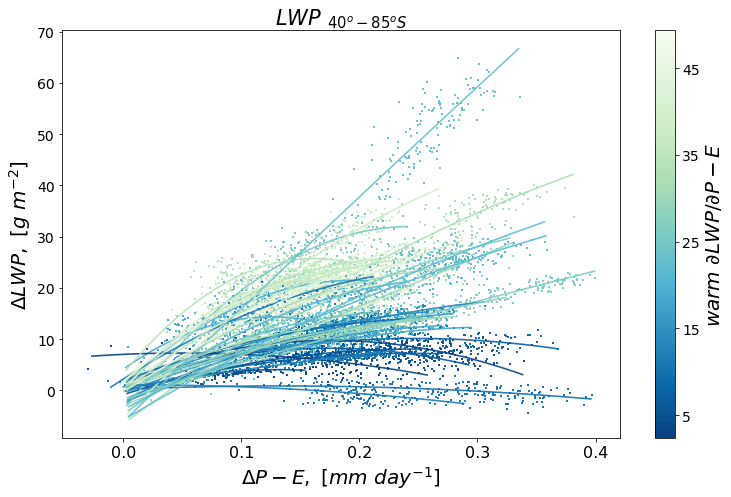

In [27]:
# import Mark's data for CMIP5, CMIP6 models' EffCS, SWCLD..:
import json

f = open('cmip56_forcing_feedback_ecs.json','r')
data = json.load(f)

# read through CMIP5 + CMIP6 EffCS and SWfb values:
EffCS = {}
SWCLD = {}

for i in range(len(deck_nas2)):

    if deck2[i]['cmip'] == 'cmip5':
        EffCS[deck_nas2[i]] = data['CMIP5'][deck2[i]['modn']][deck2[i]['ensmem']]['ECS']
        SWCLD[deck_nas2[i]] = data['CMIP5'][deck2[i]['modn']][deck2[i]['ensmem']]['SWCLD']

    if deck2[i]['cmip'] == 'cmip6':

        if deck2[i]['modn'] == 'EC-Earth3':
            EffCS[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']]['r8i1p1f1']['ECS']
            SWCLD[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']]['r8i1p1f1']['SWCLD']
        else:
            EffCS[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']][deck2[i]['ensmem']]['ECS']
            SWCLD[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']][deck2[i]['ensmem']]['SWCLD']

# Plotting: 

ECS = []
for i in range(len(deck_nas2)):
    ECS.append(EffCS[deck_nas2[i]])
ECS = np.asarray(ECS)

sorted_EffCS_index = sorted(range(50), key = lambda index:ECS[index])
ordinal_EffCS_index = [sorted_EffCS_index.index(i) for i in range(50)]
# print(sorted_EffCS_index)
# print(ordinal_EffCS_index)

stcoef_qcon11 = []
stcoef_qcon12 = []
for i in arange(len(deck_nas2)):

    stcoef_qcon11.append(output_2lrm_coef_LWP[deck_nas2[i]][0][0][1])
    stcoef_qcon12.append(output_2lrm_coef_LWP[deck_nas2[i]][1][0][1])

sorted_dLWPdP_E2_index = sorted(range(50), key = lambda index:stcoef_qcon12[index])

ordinal_dLWPdP_E2_index = [sorted_dLWPdP_E2_index.index(i) for i in range(50)]

# Colors:
Blues_colormap = matplotlib.cm.get_cmap("GnBu_r") # coolwarm
COLORS = [Blues_colormap(x) for x in np.linspace(0., 0.95, num=50)]
COLORS = [matplotlib.colors.to_hex(color) for color in COLORS]
# print(COLORS)
# Create My Own colormap:
cmap = matplotlib.cm.GnBu_r
norm = matplotlib.colors.Normalize(vmin = min(stcoef_qcon12) *1000., vmax = max(stcoef_qcon12) *1000.)

# Calc the 40--85 averaged annually changes in LWP; globally averaged annually changes in GMT; colored by \Delta LWP/ \Delta GMT;

an_delta_LWP = np.full((len(deck_nas2), 150), 0.0)  # annually time series of 40 -- 85 averaged changes in LWP for GCMs;
an_delta_P_E = np.full((len(deck_nas2), 150), 0.0)  # annually time series of 40 -- 85 averaged changes in P - E for GCMs;
an_delta_GMT = np.full((len(deck_nas2), 150), 0.0)  # annually time series of globally changes in GMT for GCMs;

mean_state_LWP = np.full(len(deck2), 0.0)
mean_state_P_E = np.full(len(deck2), 0.0)
for i in range(len(deck_nas2)):

    an_delta_LWP[i,:] = (area_mean(output_2lrm_yr_bin_abr[deck_nas2[i]]['LWP_yr_bin'], y_range, x_range)[0:150] - np.nanmean(area_mean(output_2lrm_yr_bin_PI[deck_nas2[i]]['LWP_yr_bin'], y_range, x_range)))
    an_delta_P_E[i,:] = (area_mean(output_2lrm_yr_bin_abr[deck_nas2[i]]['p_e_yr_bin'], y_range, x_range)[0:150] - np.nanmean(area_mean(output_2lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'], y_range, x_range)))
    an_delta_GMT[i,:] = (area_mean(output_2lrm_yr_bin_abr[deck_nas2[i]]['gmt_yr_bin'], s_range, x_range)[0:150] - np.nanmean(area_mean(output_2lrm_yr_bin_PI[deck_nas2[i]]['gmt_yr_bin'], s_range, x_range)))

    mean_state_LWP[i] = np.nanmean(area_mean(output_2lrm_yr_bin_PI[deck_nas2[i]]['LWP_yr_bin'], y_range, x_range))
    mean_state_P_E[i] = np.nanmean(area_mean(output_2lrm_yr_bin_PI[deck_nas2[i]]['gmt_yr_bin'], s_range, x_range))

# Plotting: 
# print(an_delta_GMT)
# print(an_delta_LWP_raw)

import matplotlib
parameters = {'axes.labelsize': 20, 'legend.fontsize': 16,
         'axes.titlesize': 21,  'xtick.labelsize': 16,  'ytick.labelsize': 14}
plt.rcParams.update(parameters)

fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.5))

for i in range(len(deck2)):
    
    if (i != 30):
        x = an_delta_P_E[i] - np.mean(an_delta_P_E[i][0])
        y = 1000. * (an_delta_LWP[i] - np.mean(an_delta_LWP[i][0])) # + mean_state_LWP[i]

        # ax.scatter(x, an_delta_LWP[i] + mean_state_LWP[i], marker = 'x', s= 1)
        # ax.scatter(x[0], y[0], marker = 'o', s = 18, edgecolors = COLORS[ordinal_dLWPdP_E2_index[i]], linewidth =2, facecolors = 'none')
        sca1 = ax.scatter(x, y, c = COLORS[ordinal_dLWPdP_E2_index[i]], marker = 's', s= 1)
        POPT_gmtLWP, POCV_gmtLWP = curve_fit(target_func_poly2, x, y)
        # print(POPT_gmtLWP)

        x_fit = np.linspace(min(x), max(x), 150)
        # ax.plot(x_fit, POPT_gmtLWP[0] * x_fit + POPT_gmtLWP[1], color = COLORS[ordinal_dLWPdP_E2_index[i]], linewidth = 2.2, linestyle = '-', alpha = 0.9, zorder = 99)
        ax.plot(x_fit[2:], POPT_gmtLWP[0] * x_fit[2:]**2 + POPT_gmtLWP[1] * x_fit[2:]**1 + POPT_gmtLWP[2], color = COLORS[ordinal_dLWPdP_E2_index[i]], linewidth = 1.62, linestyle = '-', alpha = 0.9, zorder = 99)

cbar = plt.colorbar(mappable = mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation = 'vertical', label = "$warm\ {\partial LWP}/{\partial {P - E}}$")
cbar.set_ticks(np.linspace(5, 45, 5, endpoint = True))
# cbar.set_ticklabels(['0', '10', '20', '30', '40', '50'])  # VERTICAL colorbar

# Plot setting:

# ax.set_xlim(-0.10, 0.5)
# ax.set_xticks(arange(-0.10, 0.60, 0.10))
# ax.set_ylim(-0.02, 0.08)
# ax.set_yticks(arange(-0.02, 0.08, 0.02))
ax.set_xlabel(r"$ \Delta P-E,\ [mm\ day^{-1}]$")
ax.set_ylabel(r"$ \Delta LWP,\ [g\ m^{-2}]$")

ax.set_title(r"$LWP\ _{40^{o} -85^{o} S}$")

# plt.savefig(path_plot + "Fig8th:annuallytimeseries_dLWP(SO)_dP_E(warm).jpg", bbox_inches = 'tight', dpi = 450)